In [22]:
from __future__ import print_function;
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.signal import convolve2d

# Achieves close to 100% accuracy in predicting the x and y co-ordinates and the radius of randomly generated points

In [23]:
def create_training_data():
    l = 10000;
    X_train = np.zeros(shape=[l, IMG_SIZE, IMG_SIZE,1]);
    Y_train = np.zeros(shape = [l,3]);
    
    for i in range(l):
        rad = random.randint(1,1);
        cx = random.randint(rad,IMG_SIZE-rad);
        cy = random.randint(rad, IMG_SIZE-rad);
        Y_train[i,0] = cx/IMG_SIZE;
        Y_train[i,1] = cy/IMG_SIZE;
        Y_train[i,2] = rad/IMG_SIZE;
        blank_image = np.ones(shape=[IMG_SIZE, IMG_SIZE], dtype = np.uint8);
        X_train[i,:,:,0] = cv2.circle(blank_image, (cx,cy), rad, 0, -1);
        
    return {'X_Train' : X_train, 'Y_train' : Y_train};

training_data = create_training_data();

(200, 200)
165 62 26


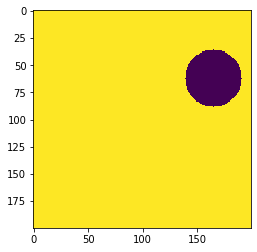

In [259]:
# print(training_data['X_Train'].shape)
# print(len(training_data['X_Train']))
# plt.imshow(training_data['X_Train'][24].reshape(200,200))
# # plt.grid()
# 200*training_data['Y_train']


IMG_SIZE = 200;
rad = random.randint(1,53);
cx = random.randint(rad,IMG_SIZE-rad);
cy = random.randint(rad, IMG_SIZE-rad);
blank_image = np.ones(shape = [IMG_SIZE, IMG_SIZE], dtype = np.uint8);
new_img = cv2.circle(blank_image, (cx,cy), rad, 0, -1);

plt.imshow(new_img)
print(np.shape(new_img))
print(cx,cy,rad)

(3, 3)


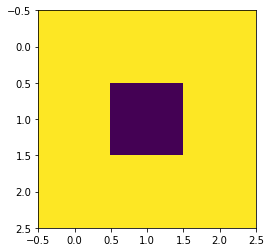

In [260]:
kernel = np.array([[2,2,2],[2,-20,2],[2,2,2]])
plt.imshow(kernel)
print(kernel.shape)

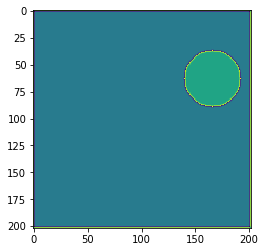

In [261]:
# for h in range(len(training_data['X_Train'])):
# img = convolve2d(training_data['X_Train'][24].reshape(200,200), kernel)

img = convolve2d(new_img, kernel)
plt.imshow(img)

In [262]:
coordinates = [];

for i in range(len(img)):
    for j in range(len(img)):
        if i > 5 and i < 197:
            if j > 5 and j < 197:
                if img[i][j] > 4:
                    print(i,j)
                    print(img[i,j])
                    coordinates.append([i,j])

37 166
10
38 159
8
38 160
6
38 161
6
38 162
6
38 163
6
38 164
6
38 168
6
38 169
6
38 170
6
38 171
6
38 172
6
38 173
8
39 156
8
39 157
6
39 175
6
39 176
8
40 154
8
40 178
8
41 153
6
41 179
6
42 151
8
42 181
8
43 150
6
43 182
6
44 149
6
44 183
6
45 148
6
45 184
6
46 147
6
46 185
6
47 146
6
47 186
6
48 145
8
48 187
8
50 144
6
50 188
6
51 143
8
51 189
8
53 142
8
53 190
8
54 142
6
54 190
6
56 141
8
56 191
8
57 141
6
57 191
6
58 141
6
58 191
6
59 141
6
59 191
6
60 141
6
60 191
6
61 141
6
61 191
6
63 140
10
63 192
10
65 141
6
65 191
6
66 141
6
66 191
6
67 141
6
67 191
6
68 141
6
68 191
6
69 141
6
69 191
6
70 141
8
70 191
8
72 142
6
72 190
6
73 142
8
73 190
8
75 143
8
75 189
8
76 144
6
76 188
6
78 145
8
78 187
8
79 146
6
79 186
6
80 147
6
80 185
6
81 148
6
81 184
6
82 149
6
82 183
6
83 150
6
83 182
6
84 151
8
84 181
8
85 153
6
85 179
6
86 154
8
86 178
8
87 156
8
87 157
6
87 175
6
87 176
8
88 159
8
88 160
6
88 161
6
88 162
6
88 163
6
88 164
6
88 168
6
88 169
6
88 170
6
88 171
6
88 172
6
88 173


In [263]:
x_coord = []
y_coord = []
for i in range(len(coordinates)):
    x_coord.append(coordinates[i][0])
    y_coord.append(coordinates[i][1])
    
print(max(x_coord)-min(x_coord))
print(max(y_coord)-min(y_coord))

radius_x = (max(x_coord)-min(x_coord))/2
radius_y = (max(y_coord)-min(y_coord))/2
center_x = min(x_coord)+radius_x-1
center_y = min(y_coord)+radius_y-1
print(radius_x,center_x,center_y)

52
52
26.0 62.0 165.0


In [264]:
print(cx,cy,rad)

165 62 26
